In [38]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.pseudo_classifier_utils as pseudo_classifier_utils
import utils.classifier_utils as classifier_utils

import utils.io_utils as io_utils

import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import matplotlib
import utils.spike_utils as spike_utils
import utils.subspace_utils as subspace_utils
from trial_splitters.condition_trial_splitter import ConditionTrialSplitter 
from utils.session_data import SessionData
from constants.behavioral_constants import *
from constants.decoding_constants import *
import seaborn as sns
from scripts.anova_analysis.anova_configs import *
from scripts.anova_analysis.run_anova import load_data
import scipy
import argparse
import copy
from spike_tools import (
    general as spike_general,
    analysis as spike_analysis,
)
import itertools

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
args = argparse.Namespace(
    **AnovaConfigs()._asdict()
)
args.subject = "BL"
args.trial_event = "FeedbackOnsetLong"
# args.conditions = ["BeliefConf", "BeliefPartition"]
# args.beh_filters = {"Response": "Correct", "Choice": "Chose"}
args.trial_interval = get_trial_interval(args.trial_event)

In [39]:
pseudo_unit_id = 2019052913
feat = "RIPPLE"

In [40]:
unit_id = int(pseudo_unit_id)
args.feat = feat
session = int(unit_id / 100)
beh, frs = load_data(session, args, return_merged=False)
frs = frs[frs.PseudoUnitID == unit_id]

sub_beh = beh[beh.BeliefPartition.isin([f"High {args.feat}", f"High Not {args.feat}"])]
block_beh = beh[beh.CurrentRule == feat]


In [41]:
avg_frs = frs.groupby(["TrialNumber"]).FiringRate.mean().reset_index(name="AvgFiringRate")

/tmp/ipykernel_1158104/3611617627.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_beh["y"] = avg_frs.AvgFiringRate.min()


<Axes: xlabel='TrialNumber', ylabel='AvgFiringRate'>

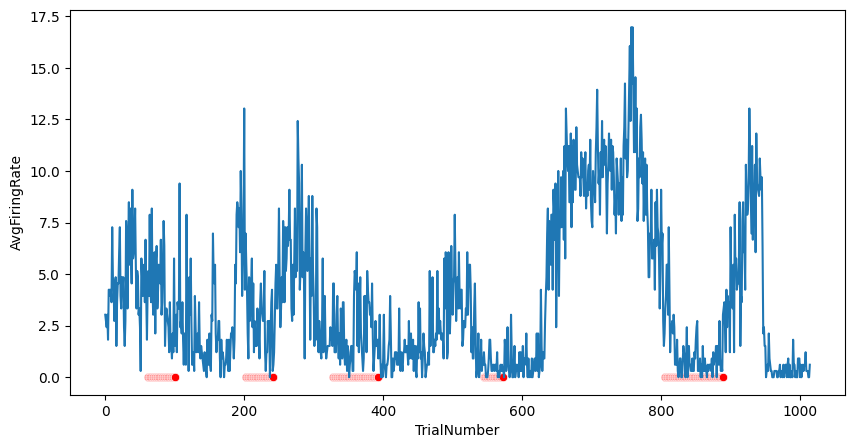

In [42]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(avg_frs, x="TrialNumber", y="AvgFiringRate", ax=ax)

block_beh["y"] = avg_frs.AvgFiringRate.min()
sns.scatterplot(block_beh, x="TrialNumber", y="y", ax=ax, color="red")